In [1]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [2]:
pip install tflearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [4]:
x

array([[[[0.28627452, 0.30588236, 0.2784314 ],
         [0.27450982, 0.29803923, 0.2509804 ],
         [0.27058825, 0.3019608 , 0.21960784],
         ...,
         [0.3254902 , 0.3647059 , 0.23529412],
         [0.36078432, 0.39215687, 0.23137255],
         [0.38039216, 0.40784314, 0.23921569]],

        [[0.29803923, 0.32156864, 0.28627452],
         [0.2901961 , 0.3137255 , 0.25882354],
         [0.28627452, 0.3137255 , 0.23137255],
         ...,
         [0.3019608 , 0.34509805, 0.21176471],
         [0.34117648, 0.37254903, 0.21176471],
         [0.36078432, 0.38431373, 0.21960784]],

        [[0.3137255 , 0.3372549 , 0.29803923],
         [0.30588236, 0.32941177, 0.27450982],
         [0.3019608 , 0.33333334, 0.24705882],
         ...,
         [0.28627452, 0.32941177, 0.19607843],
         [0.3254902 , 0.3529412 , 0.20392157],
         [0.34117648, 0.3647059 , 0.21176471]],

        ...,

        [[0.15686275, 0.15294118, 0.08627451],
         [0.14901961, 0.14509805, 0.08627451]

In [5]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
x.shape

(1360, 224, 224, 3)

In [7]:
y.shape

(1360, 17)

In [8]:
# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))

# Pooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())



# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())


# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))


# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())


# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                  

In [24]:
# Compile 
opt = tf.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Train
epochs=5
history=model.fit(x, y, batch_size=32, epochs=epochs, verbose=1,validation_split=0.2, shuffle=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/5
1088/1088 [==============================] - ETA: 0s - loss: 2.1550 - acc: 0.3226

C:\Users\HP\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 4s 4ms/sample - loss: 2.1550 - acc: 0.3226 - val_loss: 5.1937 - val_acc: 0.3199
Epoch 2/5
1088/1088 [==============================] - 3s 3ms/sample - loss: 1.9038 - acc: 0.3824 - val_loss: 51.9698 - val_acc: 0.1029
Epoch 3/5
1088/1088 [==============================] - 3s 3ms/sample - loss: 1.7844 - acc: 0.4154 - val_loss: 15.7595 - val_acc: 0.3566
Epoch 4/5
1088/1088 [==============================] - 3s 3ms/sample - loss: 1.6877 - acc: 0.4403 - val_loss: 3.6021 - val_acc: 0.4301
Epoch 5/5
1088/1088 [==============================] - 3s 3ms/sample - loss: 1.7321 - acc: 0.4605 - val_loss: 7.1833 - val_acc: 0.3272


In [27]:
import matplotlib.pyplot as plt

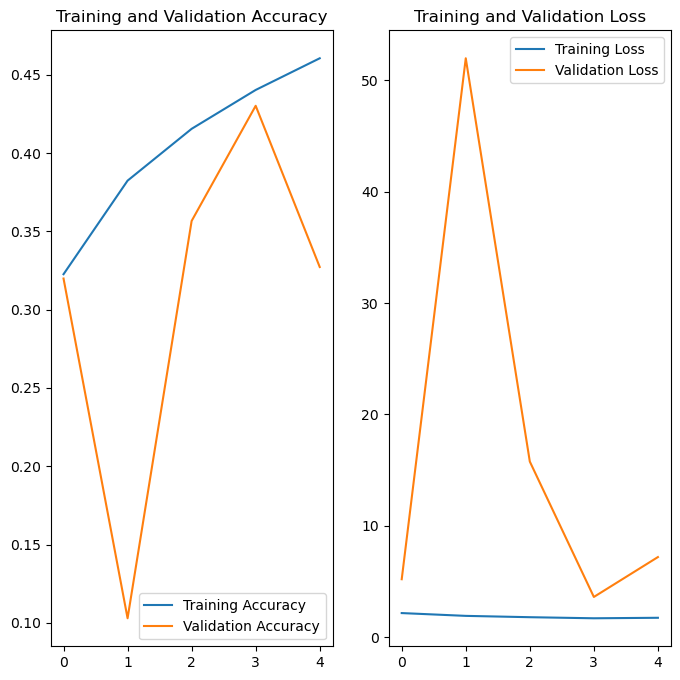

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()